## Machine Learning Models

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning

# Tắt cảnh báo ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


def classify(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    models = {
        'RandomForest': RandomForestClassifier(random_state = random_state),
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state = random_state),
        'SVC': SVC(random_state = random_state)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name}: {acc}")
        # print(classification_report(y_test, y_pred))

## Load Dataset

In [7]:
# load dataset
data_train_01 = pd.read_csv('../data/processed/train_LabelEncoder_noSubject.csv')
X = data_train_01.drop(columns=['Activity_code', 'Activity'])
y = data_train_01['Activity_code']

print("Shape X:", X.shape)
print("unique y:", y.unique())

Shape X: (7352, 561)
unique y: [2 1 0 3 4 5]


## Experiment 1: Removing features with low variance

Vì dữ liệu đã được chuẩn hóa nên **threshold=0**

In [14]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_reduced_0 = selector.fit_transform(X)
print("Shape X_reduced_0:", X_reduced_0.shape)

Shape X_reduced_0: (7352, 561)


In [5]:
classify(X_reduced_0, y)

RandomForest: 0.9768864717878993
LogisticRegression: 0.9809653297076818
SVC: 0.9680489462950373


**threshold=0.01**

In [15]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_reduced_01 = selector.fit_transform(X)
print("Shape X_reduced_01:", X_reduced_01.shape)

Shape X_reduced_01: (7352, 524)


In [16]:
classify(X_reduced_01, y)

RandomForest: 0.9809653297076818
LogisticRegression: 0.9809653297076818
SVC: 0.9687287559483345


#### Nhật xét:
- Với **threshold=0.1**: Giảm số lượng features từ 561 xuống còn 524. Accuracy có tăng nhưng rất ít

### Danh sách các đặc trưng bị loại bỏ

In [17]:
# Lưu tên đặc trưng ban đầu
feature_names = X.columns.tolist()

# Áp dụng VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_reduced_01 = selector.fit_transform(X)

# Lấy chỉ số đặc trưng được giữ lại
selected_indices = selector.get_support(indices=True)
all_indices = set(range(X.shape[1]))
removed_indices = sorted(all_indices - set(selected_indices))

# Lấy tên các đặc trưng bị loại bỏ
removed_features = [feature_names[i] for i in removed_indices]

print("Shape X:", X.shape)
print("Shape X_reduced_01:", X_reduced_01.shape)
print(f"\nSố đặc trưng bị loại bỏ: {len(removed_features)}")
print("\nCác đặc trưng bị loại bỏ:")
for feat in removed_features:
    print(feat)

Shape X: (7352, 561)
Shape X_reduced_01: (7352, 524)

Số đặc trưng bị loại bỏ: 37

Các đặc trưng bị loại bỏ:
tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-iqr()-X
tGravityAcc-iqr()-Y
fBodyAcc-bandsEnergy()-25,32.2
fBodyAcc-bandsEnergy()-33,40.2
fBodyAcc-bandsEnergy()-33,48.2
fBodyAcc-bandsEnergy()-25,48.2
fBodyAccJerk-bandsEnergy()-57,64
fBodyAccJerk-bandsEnergy()-57,64.1
fBodyAccJerk-bandsEnergy()-25,32.2
fBodyAccJerk-bandsEnergy()-33,40.2
fBodyAccJerk-bandsEnergy()-33,48.2
fBodyAccJerk-bandsEnergy()-25,48.2
fBodyGyro-bandsEnergy()-25,32
fBodyGyro-bandsEnergy()-41,48
fBodyGyro-bandsEnergy()-49,56
fBodyGyro-bandsEnergy()-57,64
fBodyGyro-bandsEnergy()-49,64
fBodyGyro-bandsEnergy()-25,48
fBodyGyro-bandsEnergy()-25,32.1
fBodyGyro-bandsEnergy()-33,40.1
fBodyGyro-bandsEnergy()-57,64.1
fBodyGyro-bandsEnergy()-33,48.1
fBodyGyro-bandsEnergy()-25,48.1
fBodyGyro-bandsEnergy()-25,32.2
fBodyGyro-ban

#### So với các đặc trưng đã được loại bỏ bởi độ tương quan cao

In [19]:
import pandas as pd

# Đọc dữ liệu sau khi giảm chiều bằng correlation
df_corr = pd.read_csv("../data/processed/train_reduced_Correlation.csv")

# Lấy tên các cột (đặc trưng) còn lại
features_corr = df_corr.drop(columns=['Activity_code', 'Activity'], errors='ignore').columns.tolist()


In [20]:

removed_by_both = set(removed_features).intersection(set(feature_names) - set(features_corr))
print(f"Đặc trưng bị loại bởi cả hai phương pháp ({len(removed_by_both)}):")
print(removed_by_both)


Đặc trưng bị loại bởi cả hai phương pháp (18):
{'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'fBodyGyro-bandsEnergy()-25,48.2', 'tGravityAcc-iqr()-Y', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-25,48.2', 'fBodyGyro-bandsEnergy()-49,64.2', 'fBodyAccJerk-bandsEnergy()-33,48.2', 'fBodyGyro-bandsEnergy()-33,48.1', 'fBodyGyro-bandsEnergy()-33,48.2', 'tGravityAcc-iqr()-X', 'fBodyAcc-bandsEnergy()-25,48.2', 'fBodyAccJerk-bandsEnergy()-33,40.2', 'fBodyGyro-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-33,48.2', 'fBodyAccJerk-bandsEnergy()-25,32.2', 'fBodyGyro-bandsEnergy()-49,64', 'fBodyGyro-bandsEnergy()-25,48.1'}


In [21]:
only_by_variance = set(removed_features) - (set(feature_names) - set(features_corr))
print(f"\nĐặc trưng chỉ bị loại bởi VarianceThreshold ({len(only_by_variance)}):")
print(only_by_variance)



Đặc trưng chỉ bị loại bởi VarianceThreshold (19):
{'fBodyAcc-bandsEnergy()-33,40.2', 'tBodyAcc-mean()-Z', 'tGravityAcc-std()-X', 'fBodyGyro-bandsEnergy()-49,56', 'fBodyGyro-bandsEnergy()-25,32.2', 'fBodyAcc-bandsEnergy()-25,32.2', 'fBodyGyro-bandsEnergy()-41,48', 'fBodyAccJerk-bandsEnergy()-57,64.1', 'tGravityAcc-std()-Y', 'tBodyAcc-mean()-Y', 'fBodyGyro-bandsEnergy()-57,64.2', 'fBodyGyro-bandsEnergy()-33,40.2', 'fBodyGyro-bandsEnergy()-25,32.1', 'tBodyAcc-mean()-X', 'fBodyGyro-bandsEnergy()-25,32', 'fBodyGyro-bandsEnergy()-41,48.2', 'fBodyGyro-bandsEnergy()-57,64.1', 'fBodyAccJerk-bandsEnergy()-57,64', 'fBodyGyro-bandsEnergy()-33,40.1'}


In [22]:
only_by_correlation = (set(feature_names) - set(features_corr)) - set(removed_features)
print(f"\nĐặc trưng chỉ bị loại bởi Correlation ({len(only_by_correlation)}):")
print(only_by_correlation)



Đặc trưng chỉ bị loại bởi Correlation (341):
{'fBodyBodyGyroJerkMag-mad()', 'fBodyAccMag-mad()', 'tBodyGyroMag-energy()', 'tBodyGyroJerk-mad()-Z', 'fBodyAcc-std()-X', 'tBodyGyro-min()-Y', 'fBodyBodyAccJerkMag-max()', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-49,64.2', 'tGravityAcc-arCoeff()-Y,3', 'tBodyAccMag-mad()', 'fBodyBodyGyroMag-kurtosis()', 'tBodyGyro-max()-X', 'fBodyAcc-energy()-Z', 'fBodyAcc-iqr()-Z', 'tBodyAcc-energy()-Z', 'tBodyGyroMag-mad()', 'tBodyAccJerk-min()-Y', 'tBodyGyroJerkMag-sma()', 'tBodyAccJerk-arCoeff()-Y,1', 'tGravityAccMag-sma()', 'fBodyGyro-bandsEnergy()-49,64.1', 'fBodyAccMag-sma()', 'fBodyAccJerk-std()-Y', 'fBodyGyro-kurtosis()-Z', 'tGravityAccMag-iqr()', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyAcc-bandsEnergy()-17,32.1', 'fBodyAccJerk-entropy()-Y', 'tBodyAcc-std()-Y', 'fBodyAccJerk-bandsEnergy()-1,8.2', 'tGravityAccMag-mean()', 'tGravityAccMag-max()', 'fBodyAcc-iqr()-Y', 'tGravityAcc-energy()-X', 'fBodyAcc-max()-Z', 'fBodyAccJerk-band

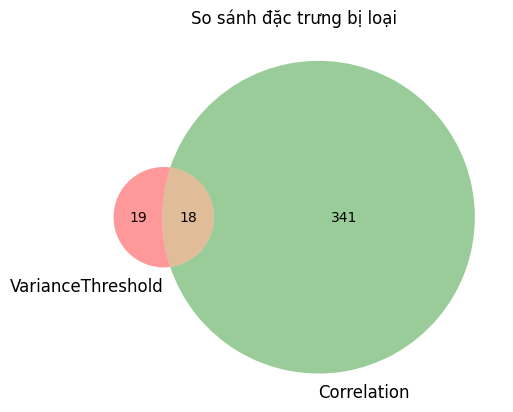

In [23]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2(
    subsets=(set(removed_features), set(feature_names) - set(features_corr)),
    set_labels=('VarianceThreshold', 'Correlation')
)
plt.title("So sánh đặc trưng bị loại")
plt.show()


## Experiment 2: Univariate feature selection

Sử dụng kết quả từ **Experiment 1** với **threshold=0.01**

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectPercentile

selector = SelectPercentile(f_classif, percentile=95)
X_reduced_01_95 = selector.fit_transform(X_reduced_01, y)
print("Shape X_reduced_01_95:", X_reduced_01_95.shape)
classify(X_reduced_01_95, y)

Shape X_reduced_01_95: (7352, 497)
RandomForest: 0.9796057104010877
LogisticRegression: 0.9809653297076818
SVC: 0.9687287559483345


#### Nhật xét: 
- Với **percentile=95**: Giảm số lượng features từ 524 xuống còn 497. Accuracy giảm nhẹ ở mô hình RandomForest, giữ nguyên kết quả ở mô hình LogisticRegression và SVC

## Experiment 3:  Recursive feature elimination

Tiếp tục với Experiment 1:

In [12]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

X = X_reduced_01
y = y

estimator = LogisticRegression(max_iter=1)

rfecv = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=1), scoring='accuracy')

In [13]:
 # DataFrame chứa tên các đặc trưng cùng thứ hạng của chúng dựa trên kết quả từ RFECV như sau:
feature_names = X.columns

# Tạo DataFrame chứa tên đặc trưng và thứ hạng tương ứng từ RFECV
df_features = pd.DataFrame({
    "Feature": feature_names,
    "Ranking": rfecv.ranking_
})

print("DataFrame chứa tên các đặc trưng và thứ hạng của chúng:")
print(df_features)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [14]:
# Ở đây, các đặc trưng được chọn sẽ có thứ hạng là 1 (vì RFECV gán thứ hạng 1 cho các đặc trưng được chọn). Bạn có thể dễ dàng lọc ra các đặc trưng được chọn bằng cách:

selected_features = df_features[df_features["Ranking"] == 1]
print("\nCác đặc trưng được chọn:")
print(selected_features)


NameError: name 'df_features' is not defined